<a href="https://colab.research.google.com/github/cherylktt/tensorflow/blob/main/02_neutral_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook, we're going to learn how to write neural networks for classification problems. A classification problem is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

> This is a binary classification problem.

Our data is a little hard to understand right now, let's visualise it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


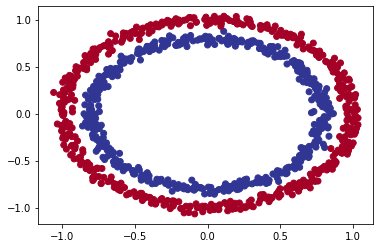

In [ ]:
# Visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

> playground.tensorflow.org

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check how many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate the model ...

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy, it is performing as if it's guessing.

In [ ]:
# Let's add an extra layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model

Let's look into how we can improve our model.

1. Create a model - add more layers, increase number of hidden units within a layer.
2. Compiling a model - choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - fit our model for more epochs (leave it training for longer).

In [ ]:
# Let's increase the number of hidden units and layers + change optimizer to Adam
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

To visualise our model's predictions, let's create a function `plot_decision_boundary()`. This function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model prediction on X.
  This function was inspired by https://cs231n.github.io/neural-networks-case-study/.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make prediction son these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


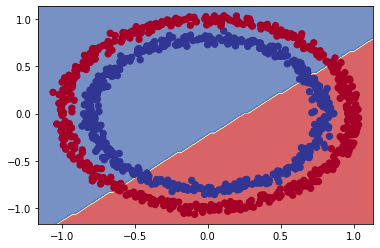

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

> The model is predicting the decision boundary to be a straight line.

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
y_reg_train = y_regression[:150]
X_reg_test = X_regression[150:]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

We compiled our model for a binary classification porblem, but now we're working on a regression problem, so let's change the model to suit our data.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

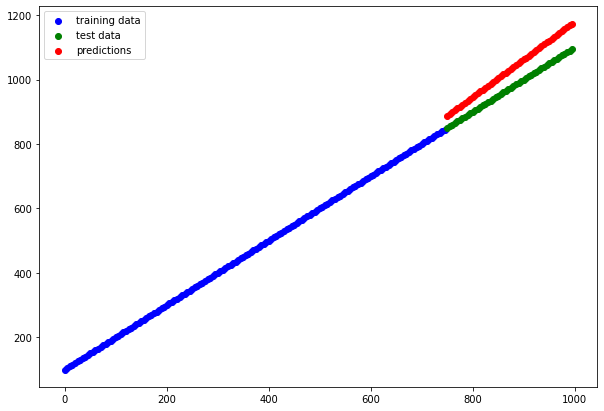

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predictions")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

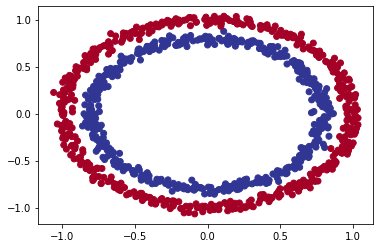

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


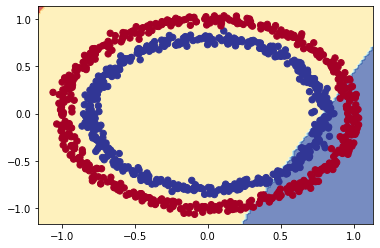

In [ ]:
# Check the decision boundary of model_4
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function.

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [ ]:
# Replicating multi-layer neural network from TensorFlow playground 

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=100, verbose=0)

model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Let's add activation to output.

doing binary classification


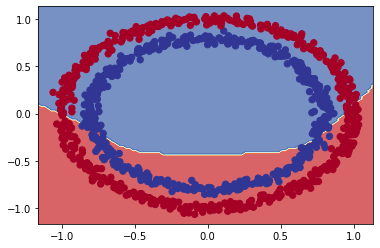

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y, epochs=100, verbose=0)

model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000


[0.024602320045232773, 1.0]

doing binary classification


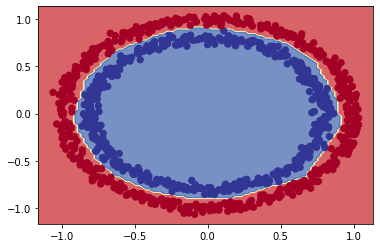

In [ ]:
plot_decision_boundary(model_7, X, y)

**Note:** The combination of **linear(straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

Now we've discussed the concept of linear and non-linear functions, let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

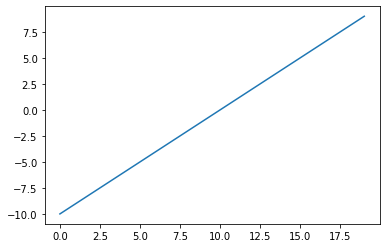

In [ ]:
# Visualise our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

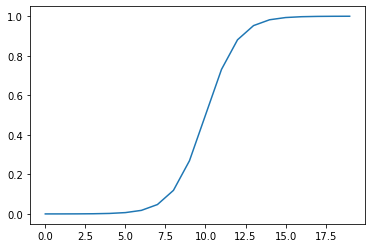

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

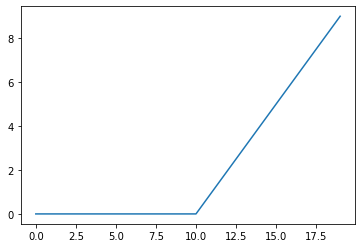

In [ ]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))

> Relu: f(x) = 0 for x < 0 ; f(x) = x for x >= 0

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

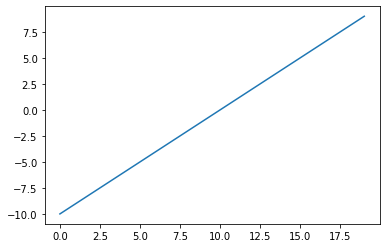

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

Let's split the X and y into training and test data instead to see if the model is very accurate.

In [ ]:
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=100, verbose=0)

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 1.0000


[0.04094330966472626, 1.0]

doing binary classification


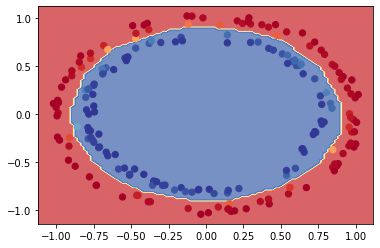

In [ ]:
y_pred = model_8.predict(X_test)
plot_decision_boundary(model_8, X_test, y_pred)

doing binary classification
doing binary classification


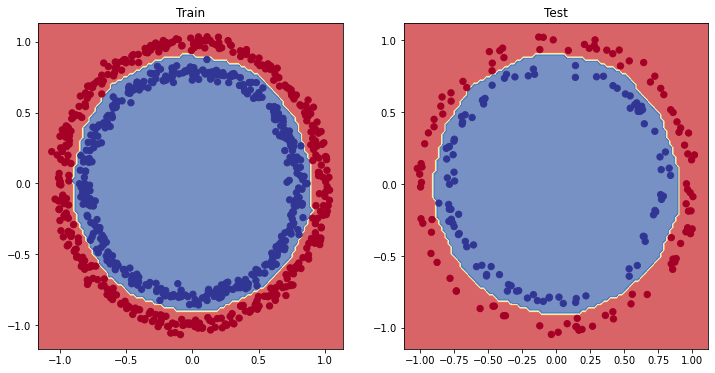

In [ ]:
# Plot the deicision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [ ]:
# Let's increasing learning rate
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_9.fit(X_train, y_train, epochs=25)

# Evaluate the model
model_9.evaluate(X_test, y_test)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6811 - accuracy: 0.6075
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6888
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7038
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.9038
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.9262
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.9800
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9837
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9887
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9925
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 1.0000
Epoch 11/25
25/25 [

[0.019240669906139374, 0.9950000047683716]

doing binary classification
doing binary classification


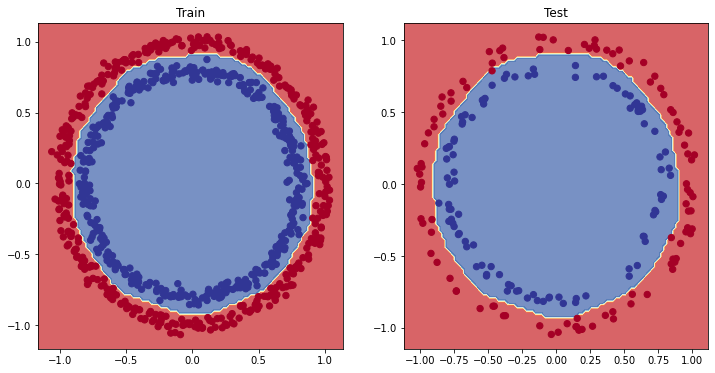

In [ ]:
# Plot the deicision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.681112,0.60750
1,0.659420,0.68875
2,0.626488,0.70375
3,0.557544,0.90375
4,0.451255,0.92625
5,0.310835,0.98000
6,0.224971,0.98375
7,0.153798,0.98875
8,0.109111,0.99250
9,0.079534,1.00000


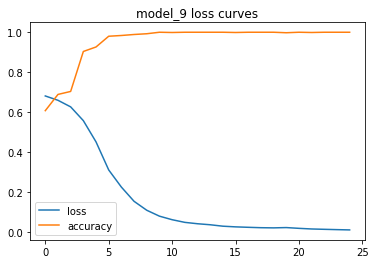

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_9 loss curves");

**Note:** For many problems, the loss function going down means the model is improving (the predictions it is making are closer to the ground truth label).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training), we're going to use the following steps:

* A learning rate **callback** - a callback is an extra piece of functionality you can add to your model *while* is it training
* Another model
* A modified loss curves plot

In [ ]:
# Let's increasing learning rate
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

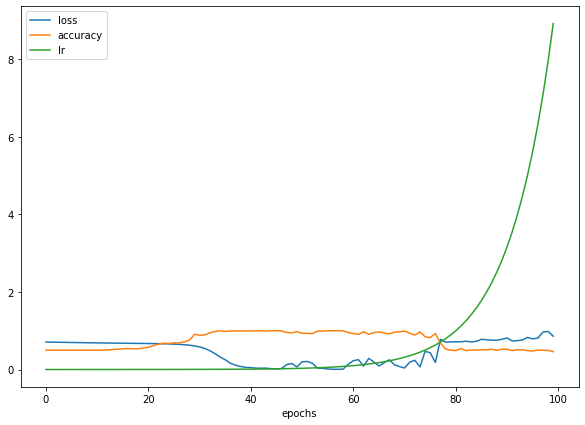

In [ ]:
# Checkout the history
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs");

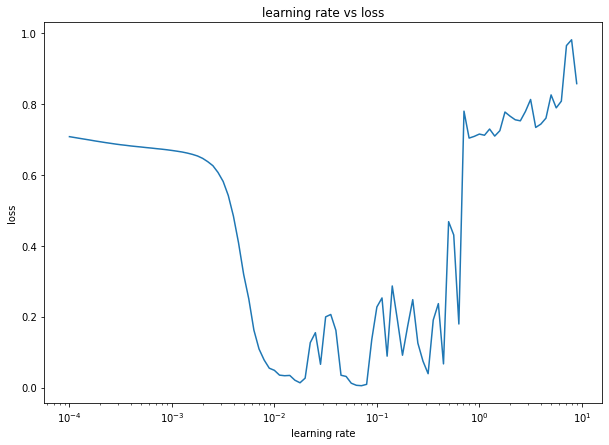

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10 ,7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss");

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's build a model with *ideal* learning rate 0.02
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_11 = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6200
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6787
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.8888
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.9737
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9875
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.9887
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9925
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9962
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9975
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9975
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model_11
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000


[0.01212796289473772, 1.0]

doing binary classification
doing binary classification


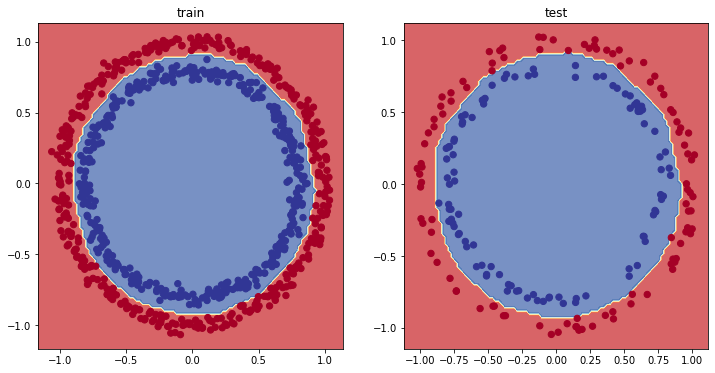

In [ ]:
# Plot decision boundary for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

Alongisde visualising our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy (`tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()`) - default metric for classification problems, not the best for imbalnaced classes.
* Precision (`tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()`) - higher precision leads to less false positives.
* Recall (`tf.keras.metrics.Recall()` or `sklearn.metrics.recall_score()`) - higher recall leads to less false negatives.
* F-1 score (`sklearn.metrics.f1_score()`) - combination of precision and recall, usually a good overall metric for a classification model.
* Confusion matrix (`custom function` or `sklearn.metrics.confusion_matrix()`) - when comparing predictions to truth labels to see where model gets confused, can be hard to use with large number of classes.
* Classification report from scikit-learn (`sklearn.metrics.classification_report`)

In [ ]:
# Check the accuracy of our model
loss, accuracy, = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000
Model loss on the test set: 0.01212796289473772
Model accuracy on the test set: 100.00%


How about a confusion matrix?

In [ ]:
# Create a new model with lower accuracy
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_12 = model_12.fit(X_train, y_train, epochs=100, verbose=0)
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7450


[0.5626760721206665, 0.7450000047683716]

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds_12 = model_12.predict(X_test)
confusion_matrix(y_test, y_preds_12)

ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds_12[:10]

array([[0.6452924 ],
       [0.74492186],
       [0.47759345],
       [0.59109133],
       [0.23810434],
       [0.32377222],
       [0.56378084],
       [0.32423496],
       [0.7471    ],
       [0.5602424 ]], dtype=float32)

> Test values are in binary form (0 or 1), but prediction values are in **prediction probability** form, which is the standard output from the sigmoid (or softmax) activation functions. So we have to turn our prediction values into binary ones.

In [ ]:
# Conver prediction probabilites to binary format and view the first 10
y_preds_12 = tf.squeeze(tf.round(y_preds_12))

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, y_preds_12)

array([[72, 29],
       [22, 77]])

How about we make our confusion matrix prettier?

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of the scikit-learn's plot_confusion_matrix function.
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_test, y_preds):

  """
  Custom function to plot confusion matrix.
  """

  figsize = (10, 7)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify our confusion matrix
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colours
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

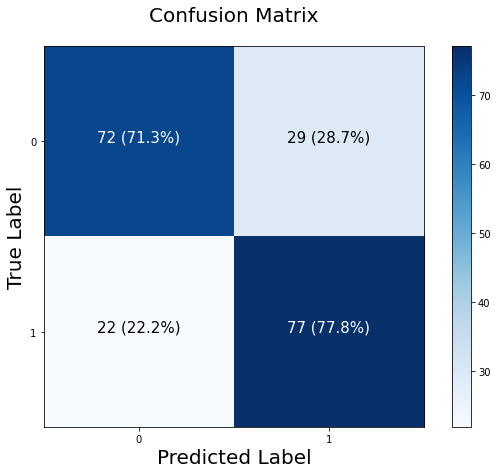

In [ ]:
make_confusion_matrix(y_test, y_preds_12)

# Working with a larger example (multi-class classification)

When you have more than 2 classes as an option, it's known as **multi-class classification**.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and tests sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

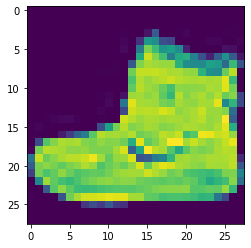

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

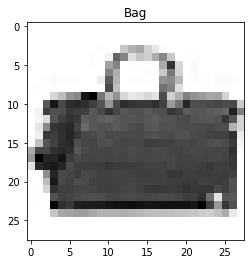

In [ ]:
# Plot an example image and its label
index_of_choice = 99
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

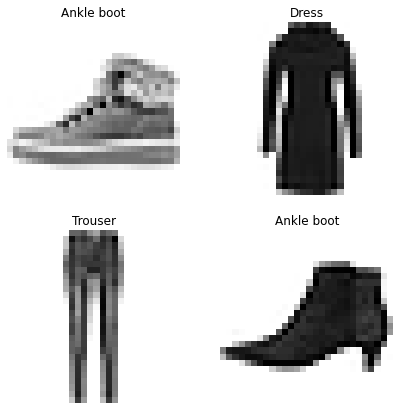

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False);

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Output layer activation = `softmax` (not `sigmoid`)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`

In [ ]:
# Our data needs to be flattened from 28*28 to None, 784 (one long vector)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

> `CategoricalCrossentropy()` expects labels in one-hot representation.

> `SpareCategoricalCrossentropy()` allows labels to be integers.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
fashion_model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
fashion_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

# Fit the model
non_norm_history_1 = fashion_model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

> If you get shape error, check input shape, output shape and loss function.

In [ ]:
# Check model summary
fashion_model_1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 4)                 3140      
                                                                 
 dense_72 (Dense)            (None, 4)                 20        
                                                                 
 dense_73 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min amd max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled (or normalised), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [ ]:
# We can get our training and test data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min amd max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Use normalised data now
tf.random.set_seed(42)

fashion_model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

norm_history_2 = fashion_model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalised (numbers between 0 and 1).

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

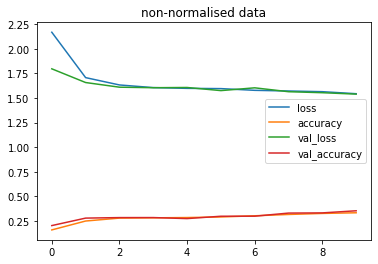

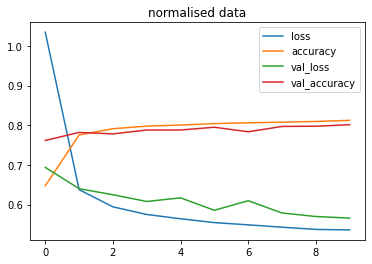

In [ ]:
import pandas as pd
# Plot non-normalised data loss curves
pd.DataFrame(non_norm_history_1.history).plot(title="non-normalised data")

# Plot normalised data loss curves
pd.DataFrame(norm_history_2.history).plot(title="normalised data")# Set random seed
tf.random.set_seed(42)

# Create the model
fashion_model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
fashion_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

# Fit the model
non_norm_history = fashion_model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

> **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

fashion_model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = fashion_model_3.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

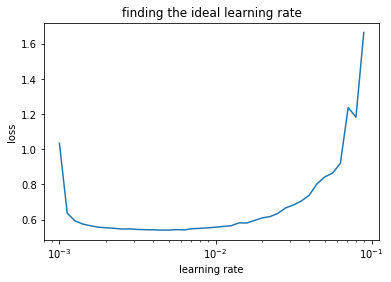

In [ ]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate");

> Default learning rate for Adam is 0.001, which is 10**-3

In [ ]:
# Let's refit a model with the ideal learning rate

tf.random.set_seed(42)

fashion_model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["accuracy"])

norm_history_4 = fashion_model_4.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model, we could do the following:

* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions through visualisations
* Improve its results by training it for longer or changing the architecture
* Save and export it for use in an application

Let's go through the top 2.

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, text_size=15):

  """
  Custom function to plot confusion matrix.
  """

  figsize=(15, 15)
  
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify our confusion matrix
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colours
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Make some predictions with our model
y_probs = fashion_model_4.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 prediction probabilities
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normal data, you'll want to make predictions on normalised data.)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

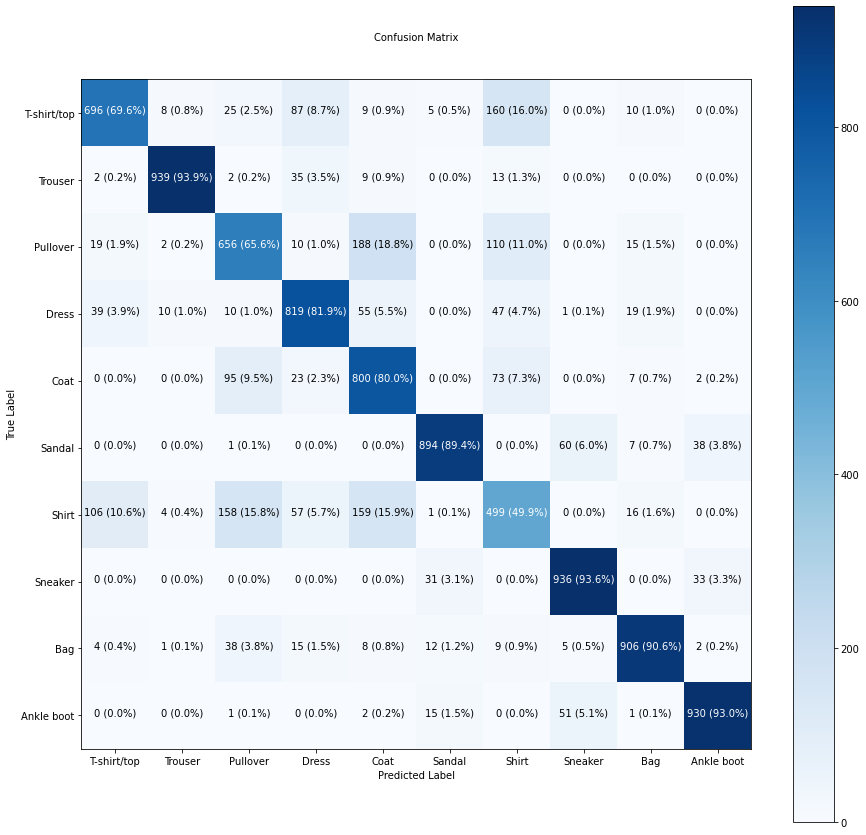

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      text_size=10)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualise as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

Let's create a function to:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

  """
  Picks a random iamge, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

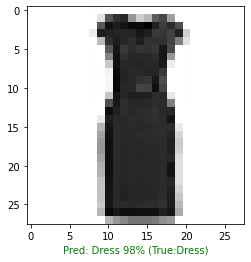

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=fashion_model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

### What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
fashion_model_4.layers

In [ ]:
# Extract a particular layer
fashion_model_4.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = fashion_model_4.layers[1].get_weights()

# Weights and shape of weights
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

> Shape of weights corresponds with (input shape (28x28), number of hidden units in that layer)

In [ ]:
# Biases and shape of biases
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix. 

The bias vector gets initialised as zeros (at least in the case of a TensorFlow Dense layer). The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
fashion_model_4.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_83 (Dense)            (None, 4)                 3140      
                                                                 
 dense_84 (Dense)            (None, 4)                 20        
                                                                 
 dense_85 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


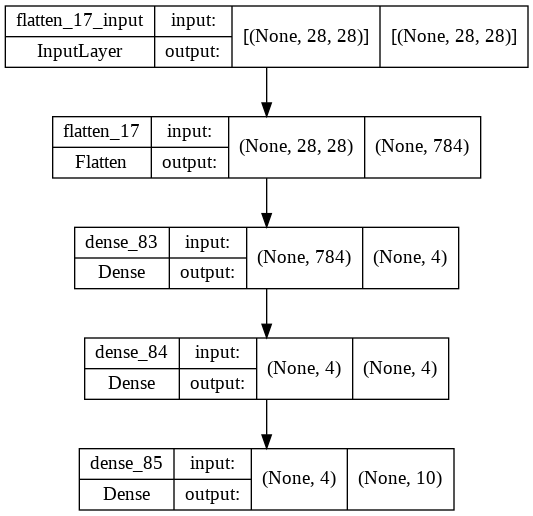

In [ ]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(fashion_model_4, show_shapes=True)

# Exercises

In [1]:
import tensorflow as tf

2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled, check a summary of the model.

In [4]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

In [14]:
# Import make_moons dataset and create moons
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,
                  random_state=42)

In [16]:
# Pack into dataframe
import pandas as pd
make_moons_df=pd.DataFrame({'col_1':X[:, 0],
                            'col_2':X[:, 1],
                            'label':y})
make_moons_df.head()

,col_1,col_2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


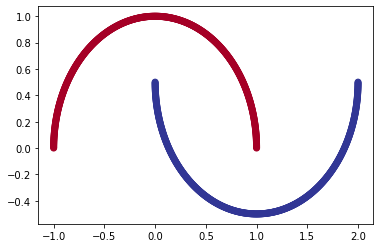

In [18]:
#Visualise dataset
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [19]:
# Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [30]:
# Build a model
tf.random.set_seed(42)

moons_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

moons_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

moons_model.fit(X_train, y_train, epochs=100, verbose=0)
moons_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 1.0000


[0.01272291224449873, 1.0]

In [23]:
# Create plot_decision_boundary function
import numpy as np

def plot_decision_boundary(model, X, y):

  """
  Plots the decision boundary created by a model predicting on X.
  """
  
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make prediction son these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


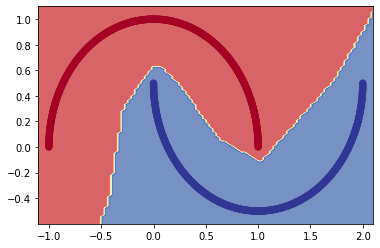

In [31]:
plot_decision_boundary(moons_model, X, y)

4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
# Index class names to labels
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
# Normalise data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [5]:
# Build a model
tf.random.set_seed(42)

fashion_model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["accuracy"])

fashion_model_5.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels))
fashion_model_5.evaluate(test_data_norm, test_labels)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5836 - accuracy: 0.7996 - val_loss: 0.4599 - val_accuracy: 0.8346
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4047 - accuracy: 0.8557 - val_loss: 0.4679 - val_accuracy: 0.8368
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3622 - accuracy: 0.8688 - val_loss: 0.4180 - val_accuracy: 0.8488
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8779 - val_loss: 0.4035 - val_accuracy: 0.8552
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3183 - accuracy: 0.8835 - val_loss: 0.3910 - val_accuracy: 0.8622
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3009 - accuracy: 0.8900 - val_loss: 0.3764 - val_accuracy: 0.8647
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2915 - accuracy: 0.8924 - val_loss: 0.3730 - val_accuracy:

[0.43773648142814636, 0.8844000101089478]

In [6]:
# Create a confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, text_size=15):

  """
  Custom function to plot confusion matrix.
  """

  figsize=(15, 15)
  
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify our confusion matrix
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colours
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [7]:
y_probs = fashion_model_5.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)

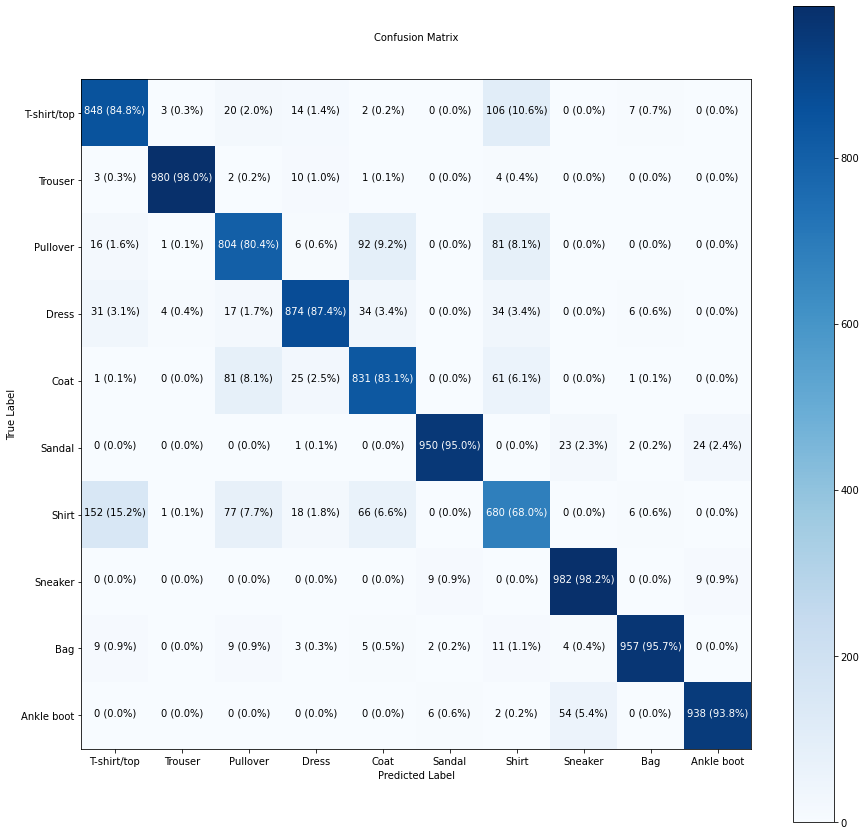

In [8]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      text_size=10)

5. Recreate [TensorFlow's softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [9]:
# Create a tensor
A = tf.constant([[1, 2, 3, 6],
                 [2, 4, 5, 6],
                 [3, 8, 7, 6]])

# Softmax function
def softmax_tensorflow(x):
  x = tf.cast(x, dtype=tf.float32)
  return tf.exp(x)/tf.reduce_sum(tf.exp(x), axis=0)

In [10]:
softmax_tensorflow(A[0, :]), softmax_tensorflow(A[1, :]), softmax_tensorflow(A[2, :])

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.00626879, 0.01704033, 0.04632042, 0.93037045], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.01203764, 0.08894681, 0.24178252, 0.65723306], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.00446236, 0.6622724 , 0.24363641, 0.08962882], dtype=float32)>)

In [11]:
tf.keras.activations.softmax(tf.cast(A, dtype=tf.float32), axis=-1)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.00626879, 0.01704033, 0.04632042, 0.93037045],
       [0.01203764, 0.08894681, 0.24178252, 0.657233  ],
       [0.00446236, 0.6622724 , 0.2436364 , 0.08962882]], dtype=float32)>

6. Create a function (or write code) to visualise multiple image predictions for the fashion MNIST at the same time. Plot at least 3 different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_random_image(model, images, true_labels, classes):

  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color)

def plot_multiple_images(model, images, true_labels, classes, num_rows, num_cols):

  """
  Picks multiple random images, plots them and labels them with a prediction and truth label.
  """

  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_random_image(model, images, true_labels, classes)

  plt.tight_layout()
  plt.show();

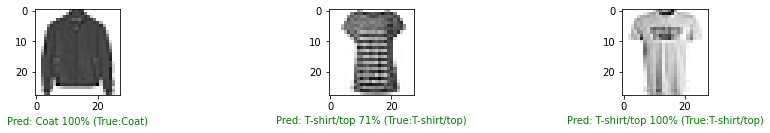

In [13]:
plot_multiple_images(fashion_model_5, test_data_norm, test_labels, class_names, 1, 3)

7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 image of the `T-shirt` class with their predictions.

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_class_image(model, images, true_labels, classes, choice_of_class):

  """
  Picks an image from a specified class, plots it and labels it with a prediction and truth label.
  """

  i = random.randint(0, len(images)-1)

  while i < len(images):
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    if true_labels[i] == choice_of_class:
      #print(i)
      plt.imshow(target_image, cmap=plt.cm.binary)

      if pred_label == true_label:
        color = "green"
      else:
        color = "red"
  
      plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_label),
                 color=color)
      break
    i = random.randint(0, len(images)-1)

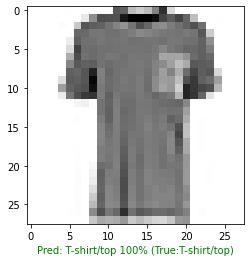

In [160]:
plot_class_image(fashion_model_5, test_data_norm, test_labels, class_names, 0)

In [155]:
# Simplifying the plot_class_images function
import random
array = [5, 7, 8, 0, 2, 4, 1, 6, 3, 9]
choice = 2
i = random.randint(0, len(array)-1)

while i < 10:
  print(i)
  if array[i] == choice:
    print(i)
    break
  i = random.randint(0, len(array)-1)

7
4
4


Text(0.5, 1.0, 'T-shirt/top')

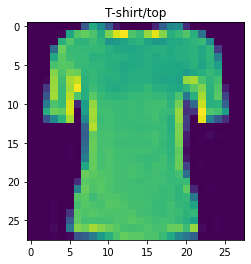

In [156]:
# Check the plot_class_images function
index=8495
plt.imshow(test_data_norm[index])
plt.title(class_names[test_labels[index]]);

In [161]:
def plot_multiple_class_images(model, images, true_labels, classes, choice_of_class, num_rows, num_cols):

  """
  Picks multiple random images of a specified class, plots them and labels them with a prediction and truth label.
  """

  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_class_image(model, images, true_labels, classes, choice_of_class)

  plt.tight_layout()
  plt.show();

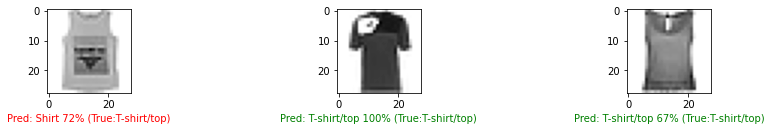

In [164]:
plot_multiple_class_images(fashion_model_5, test_data_norm, test_labels, class_names, 0, 1, 3)